In [65]:
import torch
import torchvision

In [66]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [67]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [68]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [69]:
example_data.shape

torch.Size([1000, 1, 28, 28])

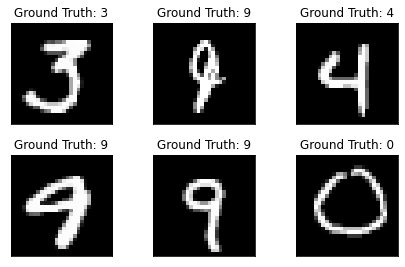

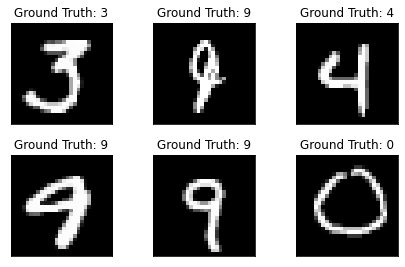

In [70]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [71]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [85]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.tanh(F.max_pool2d(self.conv1(x), 2))
        x = F.tanh(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.tanh(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [86]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
loss_f=nn.CrossEntropyLoss()


In [87]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [88]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = loss_f(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [89]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [90]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

C:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0275, Accuracy: 934/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312979
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.296290
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.229175
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.235999
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.174498
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.216093
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.135138
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.114087
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.095903
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.098433
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.028292
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.982528
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.851819
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.872630
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.766254
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.775953
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.651875
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.647648
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.612371
Train Epoch: 1 [12160/6

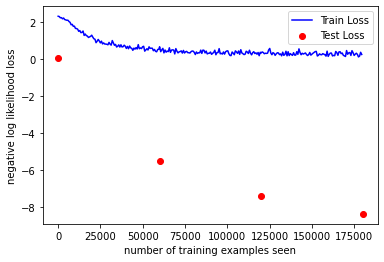

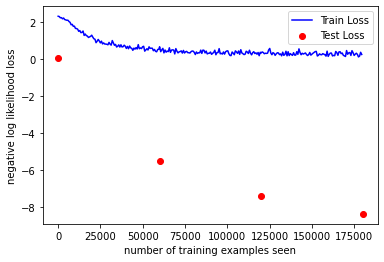

In [91]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [92]:
with torch.no_grad():
  output = network(example_data)

C:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


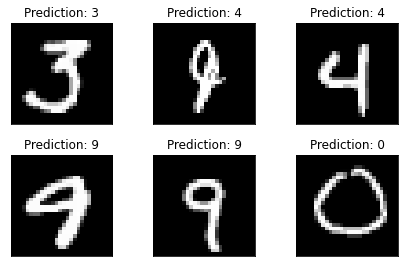

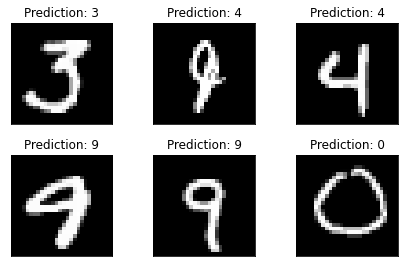

In [93]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [94]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [95]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [96]:
for i in range(4,9):
    test_counter.append(i*len(train_loader.dataset))
    train(i)
    test()

C:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.209790
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.177945
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.343947
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.253485
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.277502
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.237437
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.156911
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.470582
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.245000
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.471959
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.230455
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.353612
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.102687
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.189090
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.173578
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.219942
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.291943
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.143724
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.314619
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.229548
Train Epoch: 4 [12800/60000 (

C:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: -9.0935, Accuracy: 9673/10000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.277430
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.255588
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.102954
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.204626
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.188616
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.147895
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.179716
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.194624
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.115897
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.239062
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.249930
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.084117
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.149938
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.230245
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.380333
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.174431
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.162991
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.252408
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.230794
Train Epoch: 5 [1216

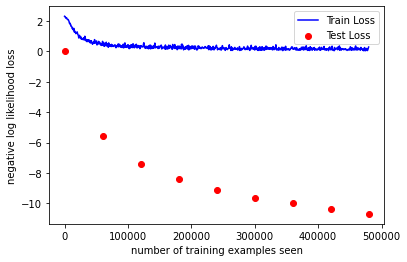

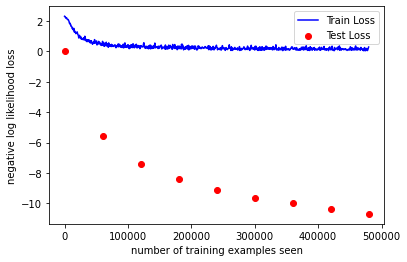

In [97]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig